In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
import os

In [87]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [88]:
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df =pd.get_dummies(df, prefix=['station' ])

#reading and dumming datta
col = list(df.columns.values)

df = df[['year', 'week', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'station_Leonard Gordon Park', 'station_Liberty Light Rail', 'station_Lincoln Park', 'station_MLK Light Rail', 'station_Manila & 1st', 'station_Marin Light Rail', 'station_McGinley Square', 'station_Monmouth and 6th', 'station_Montgomery St', 'station_Morris Canal', 'station_NJCU', 'station_Newark Ave', 'station_Newport PATH', 'station_Newport Pkwy', 'station_North St', 'station_Oakland Ave', 'station_Paulus Hook', 'station_Pershing Field', 'station_Riverview Park', 'station_Sip Ave', 'station_Union St', 'station_Van Vorst Park', 'station_Warren St', 'station_Washington St', 'station_West Side Light Rail', 'station_York St', 'anzahl']]



print(col)
print(df)

['year', 'week', 'anzahl', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'stati

In [89]:
wframe = pd.read_csv(r'weather.csv')
weather = pd.DataFrame(wframe)
weather.head()

,year,week,sunHour,totalSnow_cm,FeelsLikeC,cloudcover,humidity,precipMM,tempC,windspeedKmph
0,2015,39,10.00,0.0,18.57,37.86,66.00,0.00,21.86,13.57
1,2015,40,8.57,0.0,14.86,69.29,82.14,4.73,18.14,22.43
2,2015,41,9.31,0.0,16.29,25.00,71.57,0.71,19.57,11.71
3,2015,42,8.70,0.0,12.29,17.00,65.57,0.07,16.29,15.71
4,2015,43,7.81,0.0,12.29,27.29,68.00,0.56,16.57,16.29


In [90]:
df = pd.merge(df,weather,on=['year','week'],how='outer').dropna()
#df = df.reset_index()
print(df[df.index.duplicated()])
df = pd.DataFrame(df,columns=['year', 'week', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'station_Leonard Gordon Park', 'station_Liberty Light Rail', 'station_Lincoln Park', 'station_MLK Light Rail', 'station_Manila & 1st', 'station_Marin Light Rail', 'station_McGinley Square', 'station_Monmouth and 6th', 'station_Montgomery St', 'station_Morris Canal', 'station_NJCU', 'station_Newark Ave', 'station_Newport PATH', 'station_Newport Pkwy', 'station_North St', 'station_Oakland Ave', 'station_Paulus Hook', 'station_Pershing Field', 'station_Riverview Park', 'station_Sip Ave', 'station_Union St', 'station_Van Vorst Park', 'station_Warren St', 'station_Washington St', 'station_West Side Light Rail', 'station_York St','sunHour','totalSnow_cm','FeelsLikeC','cloudcover','humidity','precipMM','tempC','windspeedKmph', 'anzahl'])
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'

Empty DataFrame
Columns: [year, week, station_5 Corners Library, station_Astor Place, station_Baldwin at Montgomery, station_Bayside Park, station_Bergen Ave, station_Bethune Center, station_Brunswick & 6th, station_Brunswick St, station_Central Ave, station_Christ Hospital, station_City Hall, station_Columbia Park, station_Columbus Dr at Exchange Pl, station_Columbus Drive, station_Communipaw & Berry Lane, station_Danforth Light Rail, station_Dey St, station_Dixon Mills, station_Essex Light Rail, station_Exchange Place, station_Fairmount Ave, station_Garfield Ave Station, station_Glenwood Ave, station_Grand St, station_Grove St PATH, station_Hamilton Park, station_Harborside, station_Heights Elevator, station_Hilltop, station_Hoboken Ave at Monmouth St, station_JC Medical Center, station_JCBS Depot, station_Jackson Square, station_Jersey & 3rd, station_Jersey & 6th St, station_Journal Square, station_Lafayette Park, station_Leonard Gordon Park, station_Liberty Light Rail, station_Linc

In [59]:
df.to_csv('kitrainweathe.csv',index=False)

In [91]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,73:74].values
np.set_printoptions(suppress=True)
print(x[21])
print(y[21])
print(x)
print(y)

[2016.      1.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      1.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      6.71    0.09   -0.57   43.     63.29    2.1     5.
   15.71]
[121.]
[[2016.      1.      1.   ...    2.1     5.     15.71]
 [2016.      1.      0.   ...    2.1     5.     15.71]
 [2016.      1.      0.   ...    2.1     5.     15.71]
 ...
 [2018.     52.      0.   ...    2.03    6.71   13.29]
 [2018.     52.      0.   ...    2.03    6.71   13.29]
 [2018.     52.      0.   ...    2.03    6.71   13.29]]
[[36.]
 [31.]
 [ 4.]
 ...
 [64.]
 [61.]
 [34.]]


In [92]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()
# Fit train data 
x_scaler.fit(x)
y_scaler.fit(y)
x = x_scaler.transform(x)
y = y_scaler.transform(y)

In [93]:
split_horizontally_idx = int(x.shape[0]* 0.8)
x_train = x[:split_horizontally_idx , :]
x_test = x[split_horizontally_idx: , :]
y_train = y[:split_horizontally_idx , :]
y_test = y[split_horizontally_idx: , :]
print(x_train.shape); print(y_test.shape)

(5847, 73)
(1462, 1)


In [10]:
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('kimodelweather')

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Layer

model = keras.models.Sequential()
 
    
model.add(keras.layers.Dense(73, kernel_initializer='normal',  activation='relu', input_shape=(73,) ))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(73, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
model.add(Dense(1))



In [113]:
#0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mape', metrics=['mae'])

In [114]:
with tf.device('/device:GPU:0'):
    print(tf.device)
    model.fit(x_train, y_train, epochs=55 , batch_size=10,shuffle=False)

<function device_v2 at 0x00000218913A40D0>
Epoch 1/55
585/585 [==============================] - 5s 7ms/step - loss: 99.8577 - mae: 0.6715
Epoch 2/55
585/585 [==============================] - 4s 7ms/step - loss: 99.6279 - mae: 0.6703
Epoch 3/55
585/585 [==============================] - 4s 7ms/step - loss: 96.8698 - mae: 0.6456
Epoch 4/55
585/585 [==============================] - 4s 7ms/step - loss: 68.5963 - mae: 0.4345
Epoch 5/55
585/585 [==============================] - 4s 7ms/step - loss: 58.3640 - mae: 0.3779
Epoch 6/55
585/585 [==============================] - 4s 7ms/step - loss: 55.8606 - mae: 0.3697
Epoch 7/55
585/585 [==============================] - 4s 7ms/step - loss: 54.9877 - mae: 0.3649
Epoch 8/55
585/585 [==============================] - 4s 7ms/step - loss: 54.2793 - mae: 0.3620
Epoch 9/55
585/585 [==============================] - 4s 7ms/step - loss: 53.6252 - mae: 0.3603
Epoch 10/55
585/585 [==============================] - 4s 7ms/step - loss: 53.4617 - mae: 0.3

In [111]:
with tf.device('/device:CPU:0'):
    results = model.evaluate(x_test, y_test )
print("test loss, test acc:", results)

46/46 [==============================] - 0s 4ms/step - loss: 106.0102 - mae: 0.2161
test loss, test acc: [106.01017761230469, 0.21610377728939056]


In [98]:
test_data = x_train[21]
print (test_data)
with tf.device('/device:CPU:0'):
    print(y_scaler.inverse_transform(model.predict(test_data.reshape(1,73), batch_size=1)))
print(y_scaler.inverse_transform(y_train[21]))

[-1.33228663 -1.74405429 -0.14816174 -0.12587429 -0.14816174 -0.11777754
 -0.07229275 -0.08382559 -0.12587429 -0.14816174 -0.10782531 -0.14816174
 -0.14816174 -0.12014333  0.         -0.13297781 -0.12418112 -0.09904211
 -0.14816174 -0.13297781 -0.14816174 -0.14816174 -0.07324283 -0.1302885
 -0.07324283 -0.07229275 -0.14816174 -0.14816174 -0.09472562 -0.14816174
 -0.14816174  0.         -0.14816174 -0.05618486 -0.05974912 -0.13350961
 -0.13350961 -0.09472562 -0.13350961 -0.13297781 -0.14816174 -0.14816174
 -0.12418112 -0.13297781 -0.13297781 -0.14816174 -0.13297781 -0.07133028
 -0.13350961 -0.12643395  6.74938072 -0.14816174 -0.14816174 -0.10717415
 -0.14816174 -0.14816174 -0.14816174 -0.14816174 -0.14816174 -0.14622127
 -0.14816174 -0.14816174 -0.09472562 -0.1247479  -0.10044126 -1.10151446
  0.13032234 -1.11347175  0.13536408 -0.87590276 -0.01492566 -1.13447864
  0.44580243]
[[122.44201]]
[121.]


In [99]:
print("Generate predictions for 3 samples")
print(x_train)
with tf.device('/device:CPU:0'):
    predictions = model.predict(x_train)
print("predictions shape:",y_scaler.inverse_transform( predictions))
print(y_scaler.inverse_transform(y_train))

Generate predictions for 3 samples
[[-1.33228663 -1.74405429  6.74938072 ... -0.01492566 -1.13447864
   0.44580243]
 [-1.33228663 -1.74405429 -0.14816174 ... -0.01492566 -1.13447864
   0.44580243]
 [-1.33228663 -1.74405429 -0.14816174 ... -0.01492566 -1.13447864
   0.44580243]
 ...
 [ 1.16040068 -0.28589523 -0.14816174 ... -0.69272425  0.67014905
  -1.68792402]
 [ 1.16040068 -0.28589523 -0.14816174 ... -0.69272425  0.67014905
  -1.68792402]
 [ 1.16040068 -0.28589523 -0.14816174 ... -0.69272425  0.67014905
  -1.68792402]]
predictions shape: [[ 39.049343 ]
 [ 40.23199  ]
 [ -1.0404701]
 ...
 [244.44823  ]
 [123.723465 ]
 [ 64.80662  ]]
[[ 36.]
 [ 31.]
 [  4.]
 ...
 [255.]
 [124.]
 [ 68.]]


In [103]:
print("Generate predictions for 3 samples")
print(x_scaler.inverse_transform(x_test))
with tf.device('/device:CPU:0'):
    predictions = model.predict(x_test)
print("predictions shape:",y_scaler.inverse_transform( predictions))
print(y_scaler.inverse_transform(y_test))

Generate predictions for 3 samples
[[2018.     23.      0.   ...    0.9    22.      8.29]
 [2018.     23.      0.   ...    0.9    22.      8.29]
 [2018.     23.      0.   ...    0.9    22.      8.29]
 ...
 [2018.     52.      0.   ...    2.03    6.71   13.29]
 [2018.     52.      0.   ...    2.03    6.71   13.29]
 [2018.     52.      0.   ...    2.03    6.71   13.29]]
predictions shape: [[404.9734  ]
 [ 25.71597 ]
 [236.9384  ]
 ...
 [112.08199 ]
 [ 82.79042 ]
 [ 49.065746]]
[[462.]
 [ 21.]
 [271.]
 ...
 [ 64.]
 [ 61.]
 [ 34.]]


In [227]:
#save model
model.save('kimodelweather')

INFO:tensorflow:Assets written to: kimodelweather\assets


In [100]:
x = np.arange(y_train.shape[0]).reshape( y_train.shape[0])
y = y_train.reshape(  y_train.shape[0])
y2 =  predictions.reshape(  y_train.shape[0])

In [105]:
x = np.arange(y_test.shape[0]).reshape( y_test.shape[0])
y = y_test.reshape(  y_test.shape[0])
y2 =  predictions.reshape(  y_test.shape[0])

In [106]:
test = pd.DataFrame({ 'y':y ,'y2':y2})
test = test.sort_values(by=['y'])
test = test.reset_index()
test.head()

,index,y,y2
0,627,-0.869955,-0.867253
1,678,-0.869955,-0.860014
2,1080,-0.869955,-0.986931
3,526,-0.869955,-0.872192
4,979,-0.862803,-0.996683


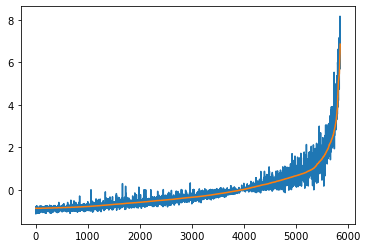

In [102]:
plt.plot(x,test['y2'] ,x,test['y'] )

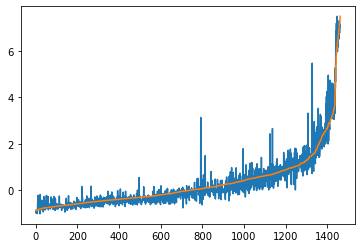

In [107]:
plt.plot(x,test['y2'] ,x,test['y'] )